# Analysis of a Decision-making Model

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brainpy/brainpy/blob/master/docs_version2/tutorial_analysis/decision_making_model.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/brainpy/brainpy/blob/master/docs_version2/tutorial_analysis/decision_making_model.ipynb)

@[Chaoming Wang](https://github.com/chaoming0625)

In this section, we are going to use the [low-dimensional analyzers](./lowdim_analysis.ipynb) to make phase plane and bifurcation analysis for the decision-making model proposed by (Wong & Wang) [1].

## Decision making model

This model considers two excitatory neural assemblies, populations  1  and  2 , that compete with each other through a shared pool of inhibitory neurons. In our analysis, we use the following model equations. 

Let $r_1$ and $r_2$ be firing rates of E and I populations, and the total synaptic input current $I_i$ and the resulting firing rate $r_i$ of the neural population $i$ obey the following input-output relationship ($F - I$ curve):

$$
r_i = F(I_i) = \frac{aI_i - b}{1-\exp(-d(a I_i - b))}
$$

which captures the current-frequency function of a leaky integrate-and-fire neuron. The parameter values are $a$ = 270 Hz/nA, $b$ = 108 Hz, $d$ = 0.154 sec.

Assume that the synaptic drive variables' $S_1$ and $S_2$ obey

$$
\frac{dS_1}{dt} = F(I_1)\,\gamma(1-S_1)-S_1/\tau_s\\
\frac{dS_2}{dt} = F(I_2)\,\gamma(1-S_2)-S_2/\tau_s
$$

where $\gamma$ = 0.641. The net current into each population is given by 

$$
I_1 = J_E S_1 + J_I S_2 + I_{b1} + J_{ext}\mu_1 \\
I_2 = J_E S_2 + J_I S_1 +I_{b2} +J_{ext}\mu_2.
$$


The synaptic time constant is $\tau_s$ = 100 ms (NMDA time consant). The synaptic coupling strengths are $J_E$ = 0.2609 nA, $J_I$ = -0.0497 nA, and $J_{ext}$ = 0.00052 nA. Stimulus-selective inputs to populations 1 and 2 are governed by unitless parameters $\mu_1$ and $\mu_2$, respectively. 

For the decision-making paradigm, the input rates $\mu_1$ and $\mu_2$ are determined by the stimulus coherence $c'$ which ranges between 0 (0%) and 1 (100%):

$$
\mu_1 =\mu_0(1+c')\\
\mu_2 =\mu_0(1-c')
$$

In [1]:
import brainpy as bp
import brainpy.math as bm

bm.enable_x64()
bm.set_platform('cpu')

In [2]:
bp.__version__

'3.0.0'

## Parameters

In [3]:
gamma = 0.641  # Saturation factor for gating variable
tau = 0.1  # Synaptic time constant [sec]
a = 270.  #  Hz/nA
b = 108.  # Hz
d = 0.154  # sec

I0 = 0.3255  # background current [nA]
JE = 0.2609  # self-coupling strength [nA]
JI = -0.0497  # cross-coupling strength [nA]
JAext = 0.00052  # Stimulus input strength [nA]
Ib = 0.3255  # The background input

## Model implementation

In [4]:
@bp.odeint
def int_s1(s1, t, s2, coh=0.5, mu=20.):
    I1 = JE * s1 + JI * s2 + Ib + JAext * mu * (1. + coh)
    r1 = (a * I1 - b) / (1. - bm.exp(-d * (a * I1 - b)))
    return - s1 / tau + (1. - s1) * gamma * r1

@bp.odeint
def int_s2(s2, t, s1, coh=0.5, mu=20.):
    I2 = JE * s2 + JI * s1 + Ib + JAext * mu * (1. - coh)
    r2 = (a * I2 - b) / (1. - bm.exp(-d * (a * I2 - b)))
    return - s2 / tau + (1. - s2) * gamma * r2

## Phase plane analysis

The advantage of the reduced model is that we can understand what dynamical behaviors the model generate for a particular parmeter set using phase-plane analysis and the explore how this behavior changed when the model parameters are varied (bifurcation analysis).

To this end, we will use ``brainpy.analysis`` module. 

We construct the phase portraits of the reduced model for different stimulus inputs (see Figure 4 and Figure 5 in (Wong & Wang, 2006) [1]). 

**No stimulus**: $\mu_0 =0$ Hz. In the absence of a stimulus, the two nullclines intersect with
each other five times, producing five steady states, of which three
are stable (attractors) and two are unstable

I am creating the vector field ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1212 candidates
I am trying to filter out duplicate fixed points ...
	Found 5 fixed points.
	#1 s1=0.5669871605297269, s2=0.031891419715715845 is a stable node.
	#2 s1=0.3138449248913604, s2=0.05578533347184533 is a saddle node.
	#3 s1=0.10265144582202472, s2=0.10265095098913242 is a stable node.
	#4 s1=0.055785342676329015, s2=0.31384493108087874 is a saddle node.
	#5 s1=0.03189144636489113, s2=0.5669870352865437 is a stable node.


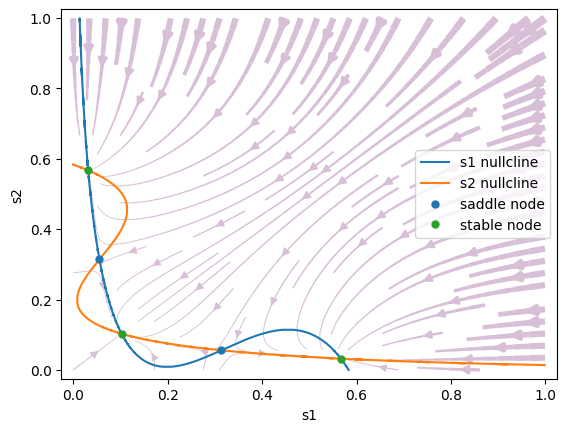

In [5]:
analyzer = bp.analysis.PhasePlane2D(
    model=[int_s1, int_s2],
    target_vars={'s1': [0, 1], 's2': [0, 1]},
    pars_update={'mu': 0.},
    resolutions=0.001,
)
analyzer.plot_vector_field()
analyzer.plot_nullcline(coords=dict(s2='s2-s1'),
                        x_style={'fmt': '-'},
                        y_style={'fmt': '-'})
analyzer.plot_fixed_point()
analyzer.show_figure()

**Symmetric stimulus**: $\mu_0=30$ Hz, $c'=0$. When a stimulus  is
applied, the phase space of the model is reconfigured. The spontaneous
state vanishes. At the same time, a saddle-type unstable
steady state is created that separates the two asymmetrical attractors. 

I am creating the vector field ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1212 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 s1=0.658694232143127, s2=0.05180719943991292 is a stable node.
	#2 s1=0.42445578984858406, s2=0.42445562837314044 is a saddle node.
	#3 s1=0.05180717720080611, s2=0.6586942355713471 is a stable node.


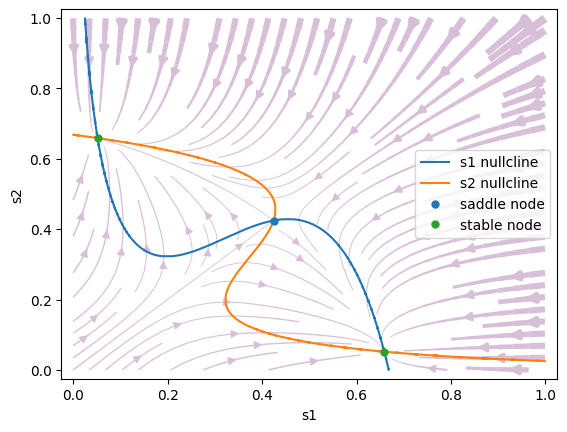

In [6]:
analyzer = bp.analysis.PhasePlane2D(
    model=[int_s1, int_s2],
    target_vars={'s1': [0, 1], 's2': [0, 1]},
    pars_update={'mu': 30., 'coh': 0.},
    resolutions=0.001,
)
analyzer.plot_vector_field()
analyzer.plot_nullcline(coords=dict(s2='s2-s1'),
                        x_style={'fmt': '-'},
                        y_style={'fmt': '-'})
analyzer.plot_fixed_point()
analyzer.show_figure()

**Biased stimulus**: $\mu_0=30$ Hz, $c' = 0.14$ (14 % coherence). The phase space changes
when a weak motion stimulus is presented. The phase space is no longer symmetrical: the attractor state s1 (correct
choice) has a larger basin of attraction than attractor s2. 

I am creating the vector field ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1212 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 s1=0.6679776124172941, s2=0.0458302222610069 is a stable node.
	#2 s1=0.3845586078985554, s2=0.4536309035289826 is a saddle node.
	#3 s1=0.05911003280235088, s2=0.6481046659437736 is a stable node.


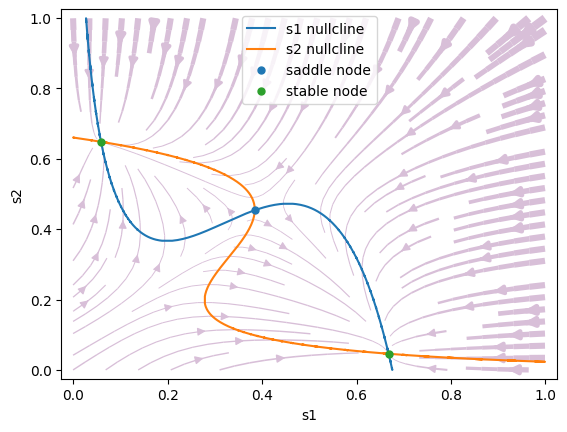

In [7]:
analyzer = bp.analysis.PhasePlane2D(
    model=[int_s1, int_s2],
    target_vars={'s1': [0, 1], 's2': [0, 1]},
    pars_update={'mu': 30., 'coh': 0.14},
    resolutions=0.001,
)
analyzer.plot_vector_field()
analyzer.plot_nullcline(coords=dict(s2='s2-s1'),
                        x_style={'fmt': '-'},
                        y_style={'fmt': '-'})
analyzer.plot_fixed_point()
analyzer.show_figure()

**Stimulus to one population only**: $\mu_0=30$ Hz, $c'=1.$ (100 % coherence). When $c'$ is sufficiently large, the
saddle steady state annihilates with the less favored attractor, leaving only one choice attractor. 

I am creating the vector field ...
I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1212 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 s1=0.7092805209334905, s2=0.023963663041994578 is a stable node.


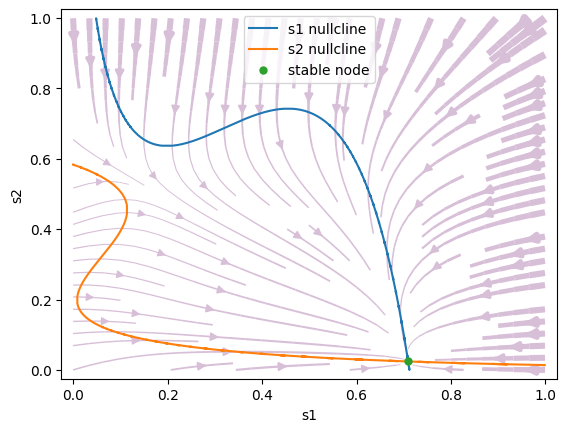

In [8]:
analyzer = bp.analysis.PhasePlane2D(
    model=[int_s1, int_s2],
    target_vars={'s1': [0, 1], 's2': [0, 1]},
    pars_update={'mu': 30., 'coh': 1.},
    resolutions=0.001,
)
analyzer.plot_vector_field()
analyzer.plot_nullcline(coords=dict(s2='s2-s1'),
                        x_style={'fmt': '-'},
                        y_style={'fmt': '-'})
analyzer.plot_fixed_point()
analyzer.show_figure()

## Bifurcation analysis

To see how the phase portrait of the system changed when we chang the stimulus current, we will generate a bifurcation diagram for the reduced model. On the bifurcation diagram the fixed points of the model are shown as a function of a changing parameter.

In the next, we generate bifurcation diagrams with the different parameters. 

**Fix the coherence $c'=0$, vary the stimulus strength $\mu_0$**. See Figure 10 in (Wong & Wang, 2006) [1]. 

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
I am trying to find fixed points by optimization ...
	There are 30000 candidates
I am trying to filter out duplicate fixed points ...
	Found 1744 fixed points.


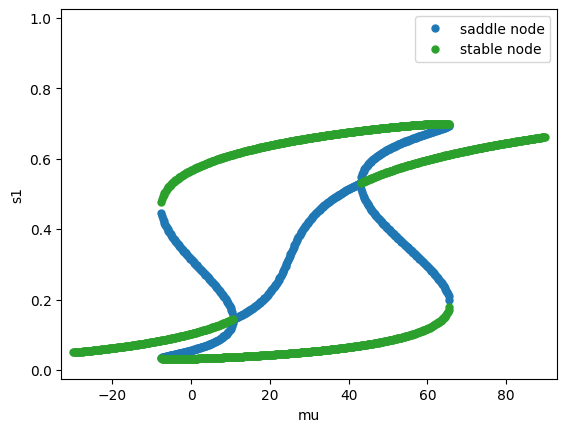

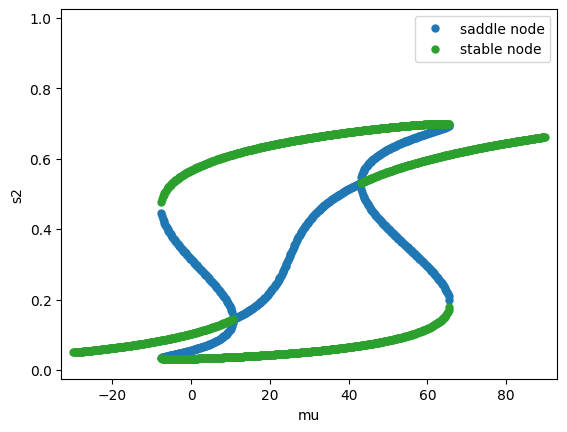

In [9]:
analyzer = bp.analysis.Bifurcation2D(
  model=[int_s1, int_s2],
  target_vars={'s1': [0., 1.], 's2': [0., 1.]},
  target_pars={'mu': [-30., 90.]},
  pars_update={'coh': 0.},
  resolutions={'mu': 0.2},
)
analyzer.plot_bifurcation(num_rank=50)
analyzer.show_figure()

**Fix the stimulus strength $\mu_0 = 30$ Hz, vary the coherence $c'$**. 

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
I am trying to find fixed points by optimization ...
	There are 10000 candidates
I am trying to filter out duplicate fixed points ...
	Found 474 fixed points.


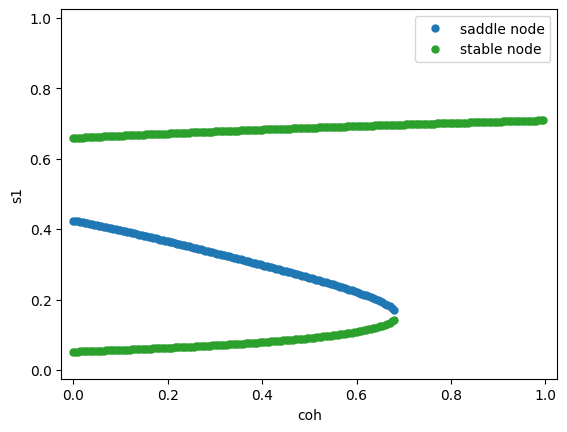

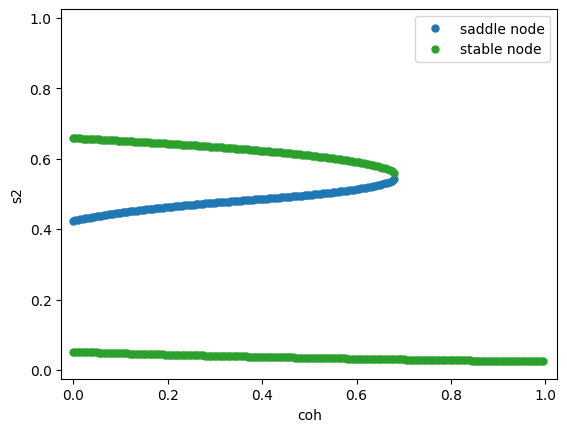

In [10]:
analyzer = bp.analysis.Bifurcation2D(
  model=[int_s1, int_s2],
  target_vars={'s1': [0., 1.], 's2': [0., 1.]},
  target_pars={'coh': [0., 1.]},
  pars_update={'mu': 30.},
  resolutions={'coh': 0.005},
)
analyzer.plot_bifurcation(num_rank=50)
analyzer.show_figure()

## References

[1] Wong K-F and Wang X-J (2006). A recurrent network mechanism for time integration in perceptual decisions. J. Neurosci 26, 1314-1328.